# License Plate Detection using OpenCV and Haar Cascade Classifier
## Name: Vincy Jovitha V
## Register no: 212223230242

# License Plate Detection - Improved Notebook
This notebook includes explanations, preprocessing improvements, modified Haar Cascade parameters, and intermediate visualizations.

(np.float64(-0.5), np.float64(633.5), np.float64(357.5), np.float64(-0.5))

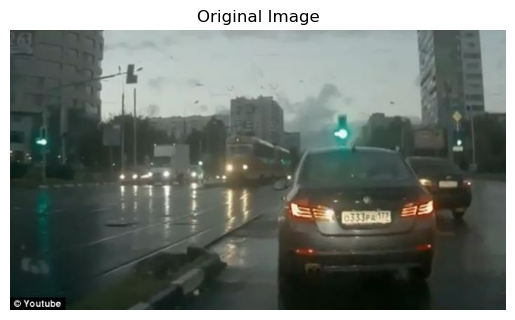

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("car_plate.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

## Convert to Grayscale and Preprocess

In [9]:
img_big = cv2.resize(img, None, fx=2.5, fy=2.5)

# Convert to grayscale
gray = cv2.cvtColor(img_big, cv2.COLOR_BGR2GRAY)

# Preprocessing
gray = cv2.equalizeHist(gray)
gray = cv2.GaussianBlur(gray, (3, 3), 0)


## Load Haar Cascade and Detect Plates

In [5]:
print(cascade.empty())

True


In [10]:
cascade = cv2.CascadeClassifier("haarcascade_licence_plate_rus_16stages.xml")

plates = cascade.detectMultiScale(
    gray,
    scaleFactor=1.01,
    minNeighbors=1,
    minSize=(20, 20)
)

print("Detected:", len(plates))

Detected: 7


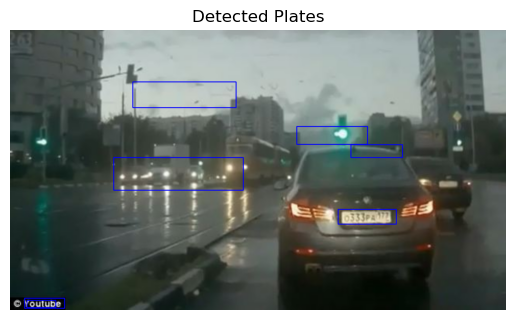

In [11]:
img_detect = img_big.copy()
for (x, y, w, h) in plates:
    cv2.rectangle(img_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img_detect, cv2.COLOR_BGR2RGB))
plt.title("Detected Plates")
plt.axis("off")
plt.show()

In [15]:
valid_plates = []
for (x, y, w, h) in plates:
    aspect_ratio = w / float(h)
    
    if 2.0 < aspect_ratio < 6.5 and w > 60 and h > 20:
        valid_plates.append((x, y, w, h))
print("Filtered valid plates:", len(valid_plates))


Filtered valid plates: 7


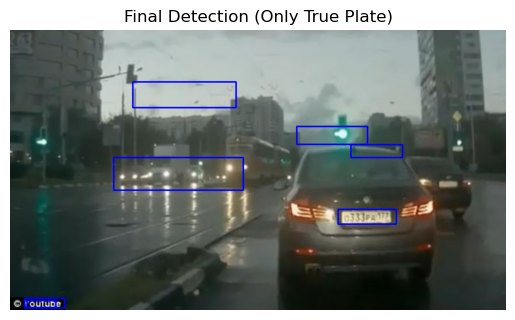

In [17]:
img_detect = img_big.copy()
for (x,y,w,h) in valid_plates:
    cv2.rectangle(img_detect, (x,y), (x+w, y+h), (255,0,0), 3)

plt.imshow(cv2.cvtColor(img_detect, cv2.COLOR_BGR2RGB))
plt.title("Final Detection (Only True Plate)")
plt.axis("off")
plt.show()

## Crop and Save Plate

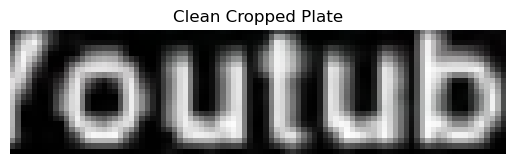

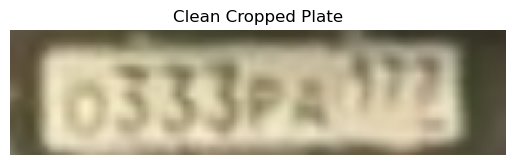

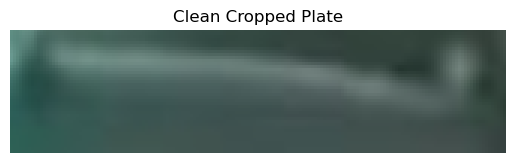

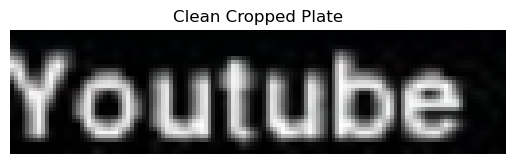

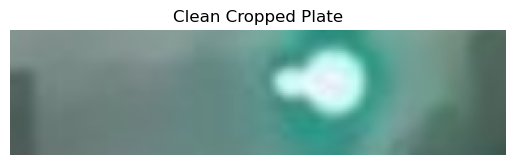

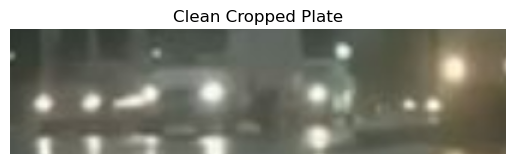

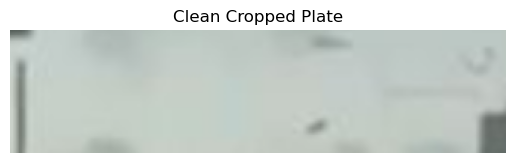

In [20]:
for (x,y,w,h) in valid_plates:
    roi = img_big[y:y+h, x:x+w]
    cv2.imwrite("cropped_plate_clean.jpg", roi)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Clean Cropped Plate")
    plt.axis("off")
    plt.show()